<a href="https://colab.research.google.com/github/PankajSingh013/Deep_learning/blob/main/Deep_learning_Tensorflow__Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
tf.__version__

'2.13.0'

In [ ]:
#building the structure

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape =[1])])



In [ ]:
#compile the model
model.compile(optimizer='sgd',loss ='mean_squared_error')

In [ ]:
#providing the data
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
#training the model
model.fit(xs,ys,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 470ms/step - loss: 24.9400
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 19.9116
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 15.9496
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 12.8266
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 10.3639
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 8.4208
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 6.8865
Epoch 8/500
1/1 [==============================] - 0s 14ms/step - loss: 5.6741
Epoch 9/500
1/1 [==============================] - 0s 14ms/step - loss: 4.7149
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 3.9551
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 3.3523
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 2.8732
Epoch 13/500
1/1 [===========================

In [ ]:
#Predicting an unknown value
print(model.predict([10]))


1/1 [==============================] - 0s 42ms/step
[[18.97982]]


In [ ]:
### buiding a simple CNN model on MNIST fashion data

fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images,training_labels),(test_images,test_labels)= fmnist.load_data()

In [ ]:
training_images.shape

(60000, 28, 28)

Label: 7

Image: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11  96   0   0   0   1   1   3   3   5   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 132 199  25   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

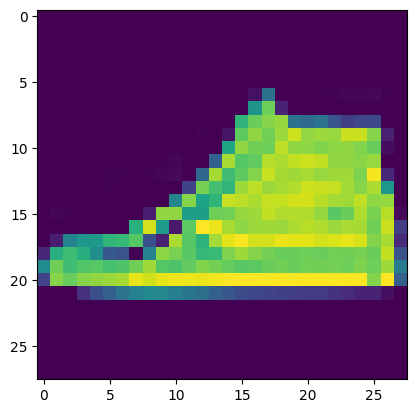

In [ ]:
#visualizing the data
import matplotlib.pyplot as plt

index = 42121

#setting the characters per row for printing
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'\nImage: \n {training_images[index]}')

plt.imshow(training_images[index])


In [ ]:
#normalizing the data btw 0 and 1
training_images = training_images/255.0
test_images = test_images/255.0

10

In [ ]:
#building the CNN model architecture
model1 = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128,activation = tf.nn.relu),
                            tf.keras.layers.Dense(10,activation = tf.nn.softmax)])

In [ ]:
#compile the model
model1.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model1.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4982 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3739 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3345 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3128 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2952 - accuracy: 0.8926


In [ ]:
model1.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3673 - accuracy: 0.8688


[0.36731114983558655, 0.8687999844551086]

In [ ]:
## Working with callbacks

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        #check the logs
        if logs.get('loss') < 0.4 :
            #stop if threshold is met
            print('\n Loss is less then 0.4, cancelling the training')
            self.model.stop_training = True
#instantize the class
callback = myCallback()

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.kerast.layers.Dense(units=10,activation=tf.nn.softmax)
])


In [ ]:
model2.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.fit(training_images,training_labels,epochs=10,callbacks = callback)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4979 - accuracy: 0.8245
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.3751 - accuracy: 0.8656
 Loss is less then 0.4, cancelling the training
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.8655
